In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 45.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 48.0 MB/s eta 0:00:00


In [ ]:
import requests
from PIL import Image
from transformers import BlipProcessor, BlipForQuestionAnswering

processor = BlipProcessor.from_pretrained("Salesforce/blip-vqa-base")
model = BlipForQuestionAnswering.from_pretrained("Salesforce/blip-vqa-base")

In [ ]:
img_url = 'https://act.accesstomemory.org/uploads/r/null/f/0/b/f0b401c2e8a9b70af1b35737850998a076da04399a8df59172d423e67bb88565/Senior_Fire_Officer_A_141.jpg'
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')

question = "What is the color of the photo?"
inputs = processor(raw_image, question, return_tensors="pt")

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

black and white


In [ ]:
question = "What is the setting of the image?"
inputs = processor(raw_image, question, return_tensors="pt")

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

portrait


In [ ]:
question = "What is the objects of the image?"
inputs = processor(raw_image, question, return_tensors="pt")

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

hat


In [ ]:
question = "What is the image all about?"
inputs = processor(raw_image, question, return_tensors="pt")

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

military


In [ ]:
question = "What is the cultural or geographics context of the image?"
inputs = processor(raw_image, question, return_tensors="pt")

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

world


In [ ]:
question = "What is the overall composition of the image?"
inputs = processor(raw_image, question, return_tensors="pt")

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

portrait


In [ ]:
question = "What decade the image come from?"
inputs = processor(raw_image, question, return_tensors="pt")

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

1920


In [ ]:
question = "What is the context on image?"
inputs = processor(raw_image, question, return_tensors="pt")

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

portrait


In [ ]:
question = "Is there people in the image?"
inputs = processor(raw_image, question, return_tensors="pt")

out = model.generate(**inputs)
result_human = processor.decode(out[0], skip_special_tokens=True)
if result_human =='yes':
  print('human')


human


In [ ]:
question = "Is there animal in the image?"
inputs = processor(raw_image, question, return_tensors="pt")

out = model.generate(**inputs)
result_animal = processor.decode(out[0], skip_special_tokens=True)
if result_animal =='yes':
  print('animal')

In [ ]:
question = "Is there building in the image?"
inputs = processor(raw_image, question, return_tensors="pt")

out = model.generate(**inputs)
result_building = processor.decode(out[0], skip_special_tokens=True)
if result_building =='yes':
  print('building')

In [ ]:
question = "Is there vehical in the image?"
inputs = processor(raw_image, question, return_tensors="pt")

out = model.generate(**inputs)
result_vehical = processor.decode(out[0], skip_special_tokens=True)
if result_vehical =='yes':
  print('vehical')

In [ ]:
def tag_generate(img_url,model_vqa,processor_vqa, q_num):
  tag=set()

  raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')

  if q_num >=1 :
    # Question 9
    question_9 = "Is there people in the image?"
    inputs = processor_vqa(raw_image, question_9, return_tensors="pt")
    out = model_vqa.generate(**inputs)
    result = processor_vqa.decode(out[0], skip_special_tokens=True)
    if result == 'yes':
      tag.add('human')
      tag.add('people')

  if q_num >=2 :
    # Question 1
    question_1 = "What is the color of the photo?"
    inputs = processor_vqa(raw_image, question_1, return_tensors="pt")
    out = model_vqa.generate(**inputs)
    tag.add(processor_vqa.decode(out[0], skip_special_tokens=True))

  if q_num >=3 :
    # Question 8
    question_8 = "What is the context on image?"
    inputs = processor_vqa(raw_image, question_8, return_tensors="pt")
    out = model_vqa.generate(**inputs)
    tag.add(processor_vqa.decode(out[0], skip_special_tokens=True))


  if q_num >=4 :
    # Question 4
    question_4 = "What is the image all about?"
    inputs = processor_vqa(raw_image, question_4, return_tensors="pt")
    out = model_vqa.generate(**inputs)
    tag.add(processor_vqa.decode(out[0], skip_special_tokens=True))

  if q_num >=5 :
    # Question 3
    question_3 = "What is the objects of the image?"
    inputs = processor_vqa(raw_image, question_3, return_tensors="pt")
    out = model_vqa.generate(**inputs)
    tag.add(processor_vqa.decode(out[0], skip_special_tokens=True))

  if q_num >=6 :
    # Question 2
    question_2 = "What is the setting of the image?"
    inputs = processor_vqa(raw_image, question_2, return_tensors="pt")
    out = model_vqa.generate(**inputs)
    tag.add(processor_vqa.decode(out[0], skip_special_tokens=True))
  if q_num >=7 :
    # Question 10
    question_10 = "Is there animal in the image?"
    inputs = processor_vqa(raw_image, question_10, return_tensors="pt")
    out = model_vqa.generate(**inputs)
    result = processor_vqa.decode(out[0], skip_special_tokens=True)
    if result == 'yes':
      tag.add('animal')
  if q_num >=8 :
    # Question 11
    question_11 = "Is there building in the image?"
    inputs = processor_vqa(raw_image, question_11, return_tensors="pt")
    out = model_vqa.generate(**inputs)
    result = processor_vqa.decode(out[0], skip_special_tokens=True)
    if result == 'yes':
      tag.add('building')


  if q_num >=9 :
    # Question 5
    question_5 = "What is the cultural or geographics context of the image?"
    inputs = processor_vqa(raw_image, question_5, return_tensors="pt")
    out = model_vqa.generate(**inputs)
    tag.add(processor_vqa.decode(out[0], skip_special_tokens=True))

  if q_num >=10 :
    # Question 6
    question_6 = "What is the overall composition of the image?"
    inputs = processor_vqa(raw_image, question_6, return_tensors="pt")
    out = model_vqa.generate(**inputs)
    tag.add(processor_vqa.decode(out[0], skip_special_tokens=True))

  if q_num >=11 :
    # Question 7
    question_7 = "What decade the image come from?"
    inputs = processor_vqa(raw_image, question_7, return_tensors="pt")
    out = model_vqa.generate(**inputs)
    tag.add(processor_vqa.decode(out[0], skip_special_tokens=True))

  if q_num >=12 :
    # Question 12
    question_12 = "Is there vehical in the image?"
    inputs = processor_vqa(raw_image, question_12, return_tensors="pt")
    out = model_vqa.generate(**inputs)
    result = processor_vqa.decode(out[0], skip_special_tokens=True)
    if result == 'yes':
      tag.add('vehical')

  tag.discard("none")

  return tag

In [ ]:
# Load the model
with open('blip_model_vqa.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Load the processor
with open('blip_processor_vqa.pkl', 'rb') as f:
    loaded_processor = pickle.load(f)

In [ ]:
url='https://act.accesstomemory.org/uploads/r/null/8/8/d/88d2340c8007d86da6026067defbc35bd3dc98a3a11a3da0ba3aa02efe84f627/Canberra_Fire_Brigade_1924_Hotchkiss_141.jpg'

In [ ]:
#number can choose up to 12
tag_generate(url,loaded_model,loaded_processor,5)

NameError: ignored

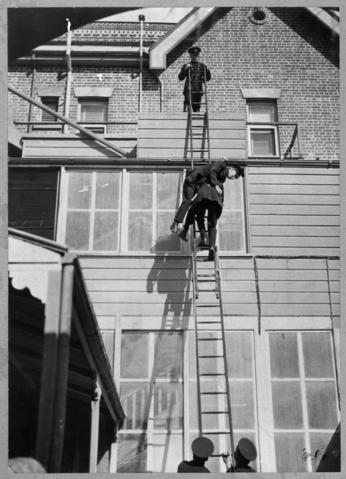

In [ ]:
raw_image

In [ ]:
import pickle

# Save the model
with open('blip_model_vqa.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save the processor
with open('blip_processor_vqa.pkl', 'wb') as f:
    pickle.dump(processor, f)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp blip_model_vqa.pkl /content/drive/MyDrive

In [ ]:
!cp blip_processor_vqa.pkl /content/drive/MyDrive